# ADM1jl - Jupyter Notebook

A Jupyter notebook to demonstrate the functionality of ADM1jl, a Julia package that solves the Anaerobic Digestion Model 1.


In [1]:
using Pkg
# Pkg.add(url="https://github.com/CourtA96/ADM1jl") # uncomment this line to install ADM1jl if it is not already 
                                                    # installed on your device
using ADM1jl

┌ Info: Precompiling ADM1jl [fcba7d9c-eb10-42d4-b263-36979bb5b0d2]
└ @ Base loading.jl:1423


## Getting Started

To solve ADM1 for a single tank reactor, use `ADM1sol(tspan, u0, IV)` where:
- `tspan` is a `Tuple{Float64}` of length 2 that specifies the solution time range (in days)
- `u0` is a `Vector{Float64}` of length 35 that specifies the initial conditions
- `IV` is a `Vector{Float64}` of length 35 that specifies the inflow concentrations

The 35 state variables, and their indices, are given in the documentation [here](https://courta96.github.io/ADM1jl/page2/#State-Variables-and-their-Indices). 

`ADM1sol` uses the `DifferentialEquations` package to solve the system, it returns a `Tuple` of length 2 that contains the system's solution and the runtime in seconds. The solution is of type `ODESolution`, which is described in greater detail in the `DifferetialEquations` package documentaion [here](https://docs.sciml.ai/DiffEqDocs/stable/types/ode_types/#SciMLBase.ODESolution).

To use `ADM1sol`, first ensure that the file `model_parameters.csv` is installed in your working directory. The `model_parameters.csv` file can be found at the github repository [here](https://github.com/CourtA96/ADM1jl/blob/main/model_parameters.csv). If you are unsure of your working directory, run the following cell and the output will be your working directory.

In [2]:
pwd()

"C:\\Users\\court\\OneDrive - University of Guelph\\PhD\\Research\\Code\\ADM1jl\\ADM1jl"

Once `model_parameters.csv` is saved to your working directory, the `ADM1sol` function can be called by running the following cell:

In [56]:
u0 = initialConditions(); # The default initial condtions
IV = inflowvector_definition(); # The default inflow concentrations
tspan = (0.0,10.0); # The solution for ten days

sol,tSol = ADM1sol(tspan,u0,IV); # solving the system for tspan, u0, and IV 

The above cell assigns the solution to the variable `sol` and the runtime to the variable `tSol`. As mentioned above, the solution has the type `ODESolution`. An `ODESolution`has two fields, `.t` and `.u`, that contain the timesteps and the solution a each timestep. The following cell show how the timesteps breakdown:

In [57]:
println("There are a total of ", length(sol.t), " timesteps.")
println("\nThe initial time is: ", sol.t[1], " days \nand the solution at that time (ie. the inital conditions) is: ", sol.u[1])
println("\nThe first timestep is at time: ", sol.t[2], " days \nand the solution at that time is: ", sol.u[2])
println("\nThe final timestep is at time: ", sol.t[end], " days \nand the solution at that time is: ", sol.u[end])

There are a total of 108 timesteps.

The initial time is: 0.0 days 
and the solution at that time (ie. the inital conditions) is: [0.012, 0.0053, 0.099, 0.012, 0.013, 0.016, 0.2, 2.3e-7, 0.055, 0.15, 0.13, 0.33, 0.31, 0.028, 0.1, 0.029, 0.42, 1.18, 0.24, 0.43, 0.14, 0.76, 0.32, 25.6, 0.011, 0.013, 0.016, 0.2, 0.14, 0.0041, 0.04, 0.02, 1.02e-5, 1.63, 0.014]

The first timestep is at time: 1.998068760796162e-5 days 
and the solution at that time is: [0.011999986305998722, 0.005299528080754454, 0.09899995851630547, 0.011999757994309943, 0.013000244814496508, 0.015999974836690346, 0.19999987668832014, 2.3401029375177689e-7, 0.05500093731160939, 0.15000108782030885, 0.12999999991276787, 0.3299999999999931, 0.3099999860135961, 0.02799999200851338, 0.1000005194457082, 0.02900010089232123, 0.4200000021685973, 1.1799999954546017, 0.2400000012108326, 0.43000000150175316, 0.14000000206430346, 0.7600000026366445, 0.31999999753085123, 25.600000019980666, 0.01192369901260399, 0.013000159436964311, 0

To plot the solutions, use the `plotSols` command.

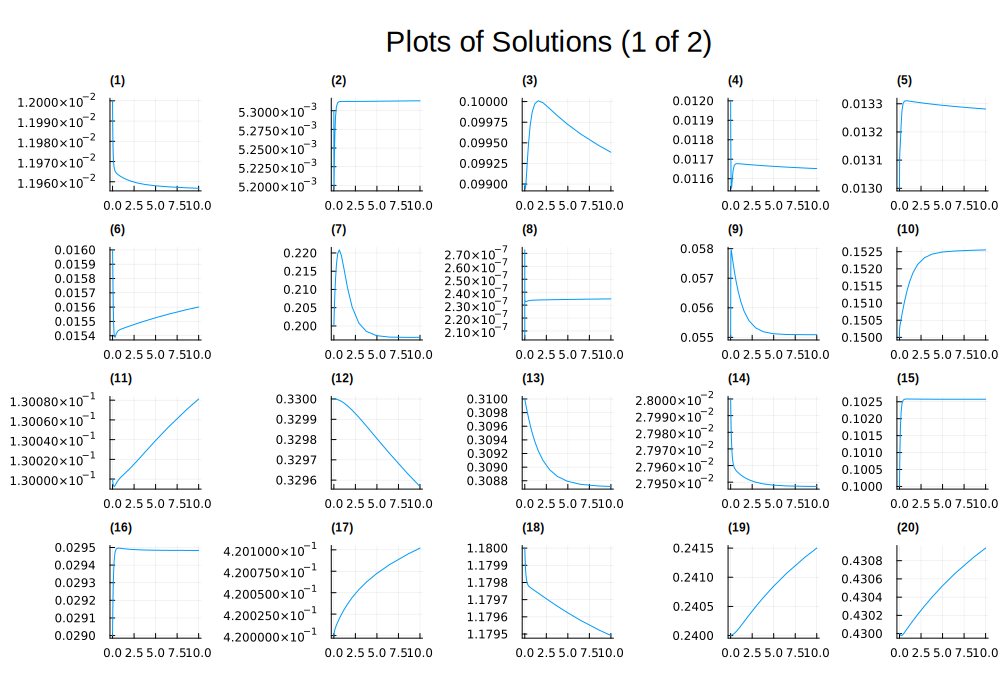

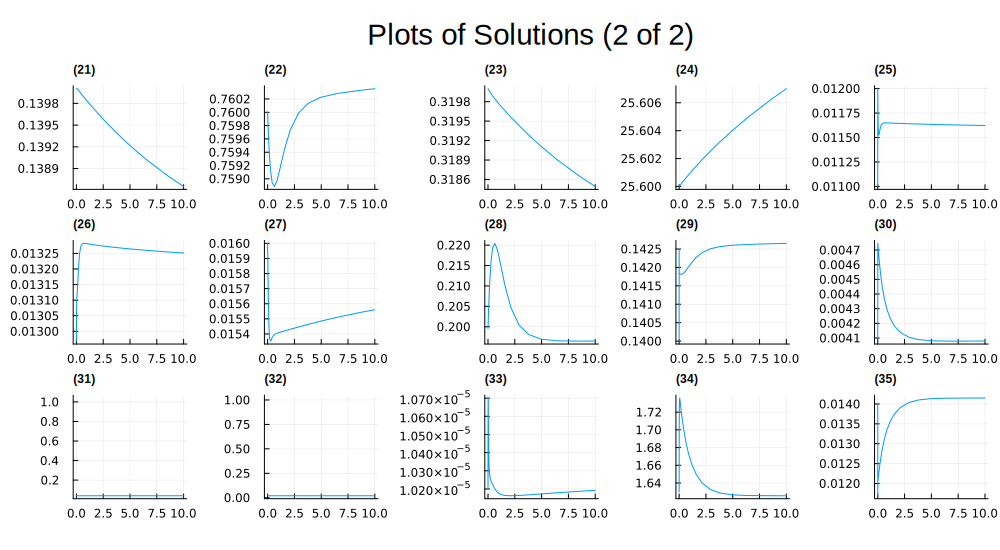

In [58]:
plotSols(sol)

To view the solutions to the state variables separately, use the `individualSolutions` command, which takes the `ODESolution` as input, and returns a vector of 35 `Vector{Float32}`s, each of which corresponds to the solution of an individual state vector.

The runtime is a `Float64` that gives the runtime in seconds. When `ADM1sol` is called for the first time, it will be slower since it needs to is being compiled. After this initial call, it will be considerably faster. Look at the following example:

In [59]:
sol2,tSol2 = ADM1sol(tspan,u0,IV);

sol3,tSol3 = ADM1sol((0.0,200.0), 2*u0, 1.5*IV);

println("The initial runtime was: ", tSol, "\nThe time for the second run is: ", tSol2, "\nand the time for the third run (with new condtions) is: ", tSol3)

The initial runtime was: 0.1625104
The time for the second run is: 0.2482333
and the time for the third run (with new condtions) is: 0.2688947


The inital runtime was approximately 33 seconds. However, the subsequent runtimes were approximately 0.2 seconds, even when the timespan of the solution increased from 10.0 day to 200.0 days.

### Specifying Algorithms

By default, `ADM1sol` solves the system using the `Rodas4P` algorithm given in the `DifferentialEquations` package (documentation for `DifferentialEquations` available [here](https://docs.sciml.ai/DiffEqDocs/stable/)). To use a different algorithm, install the `DifferentialEquations` package and follow the example below:

In [60]:
using DifferentialEquations

u0 = initialConditions();

IV = inflowvector_definition();

solRosen,tSolRosen = ADM1sol((0.0,200.0),u0,IV, alg = Rosenbrock23()); # solve the system using the Rosenbrock23 algorithm

In principle, any ODE solver listed in the `DifferentialEquations` [documentation](https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/) can be used to solve the system. However, ADM1 is a stiff system of equations, so many solvers may not be stable.

### Variable Inflow

To solve the system for variable inflow, specify the inflow as a `Vector{Vector{Float}}`, ie. as a vector that contains the vector of inflow conditions at a different times, these times are indexed by an additional input vector `t`.

The `ADM1sol` function interpolates the function using the `interpolate` function from the `Interpolations` package (documentation for `Interpolations` available [here](https://juliamath.github.io/Interpolations.jl/stable/control/)). The `Gridded(Linear())` interpolation algorithm is specified, meaning that the interpolation between timesteps is linear. Interpolation allows for the use of adaptive step methods, which are more stable than fixed stepsize methods. As when the inflow is fixed, the default solver algorithm is `Rodas4P`.

The following code breaks the 50 day timespan into 0.1 day increments and then linearly decreases the inflow from 100% of default at t = 0 days to 50% of default at t = 50 days.

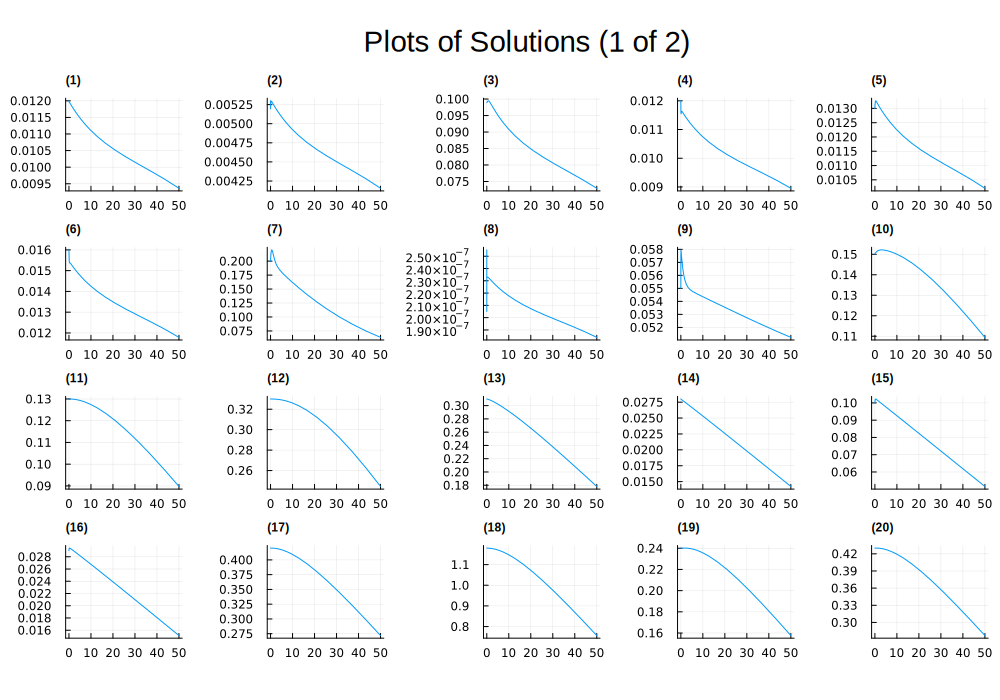

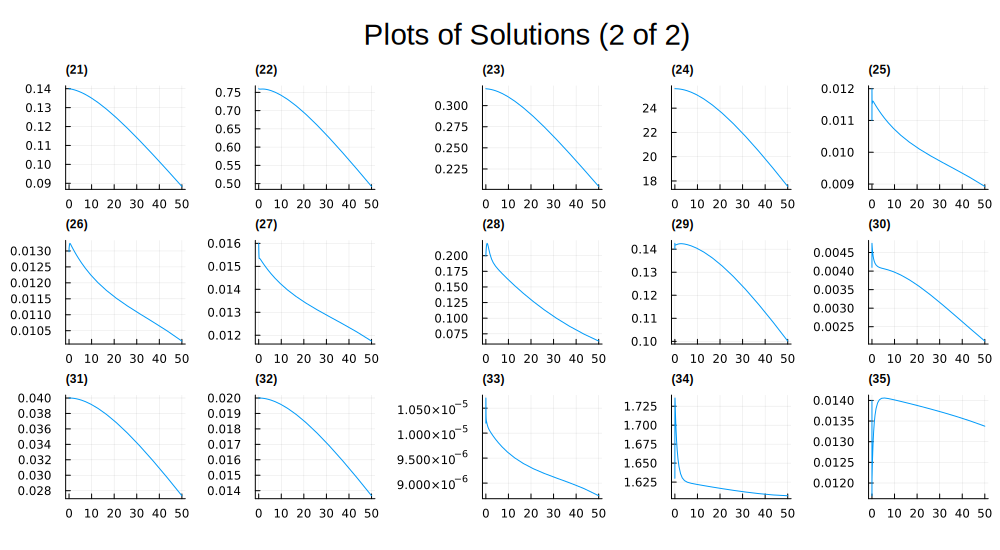

In [62]:
u0 = initialConditions(); # the default initial conditions

tspan = (0.0,50.0); # The timespan of the solution is 50 days

t = [i for i in tspan[1]:0.1:tspan[2]]; # Break the timespan into 0.1 day increments

IV_temp = inflowvector_definition(); # default inflow vector

IV = [IV_temp*(1.0-(i/100.0)) for i in t] # linearly decrease the inflow

solVariedInflow,tSolVariedInflow = ADM1sol((0.0,50.0),u0,IV,t); # solve the system

plotSols(solVariedInflow)

## Multiple Reactors in Parallel

To model multiple reactors in series, (ie. where the outflow from the first reactor becomes to inflow to the second, and so on) make sure that there are `model_parameters.csv` files corresponding to each reactor in your working directory. These files should be called `model_parameters.csv`, `model_parameters2.csv`, `model_parameters3.csv`, and so on.

To solve multiple reactors, use the `MultiChamberSolution` function, which takes the timespan, initial conditions for each reactor, the inflow vector, and the number of reactors as input. The timespan is specified the same as in `ADM1sol`, the initial conditions are specified as a `Tuple` of vectors where each vector is the initial conditions for one of the reactors, and the inflow vector is specified the same as in `ADM1sol`. `MultiChamberSolution` returns the solutions to reactors as a `Tuple`, where the first element of the `Tuple` is the solution to reactor 1, the second is the solution to reactor 2, and so on.

The following code models three reactors in series. Each of the reactors has the same initial conditions.

In [63]:
u0 = initialConditions(); # default initial conditions

IV = inflowvector_definition(); # default inflow vector

sols = MultiChamberSolution((0.0,200.0),(u0,u0,u0),IV,3); # solve the three reactors

Finished Chamber 1
Finished Chamber 2
Finished Chamber 3


The above solution can then be plotted using the `plotSols` function. The optional `titleText` argument is used to title the plots.

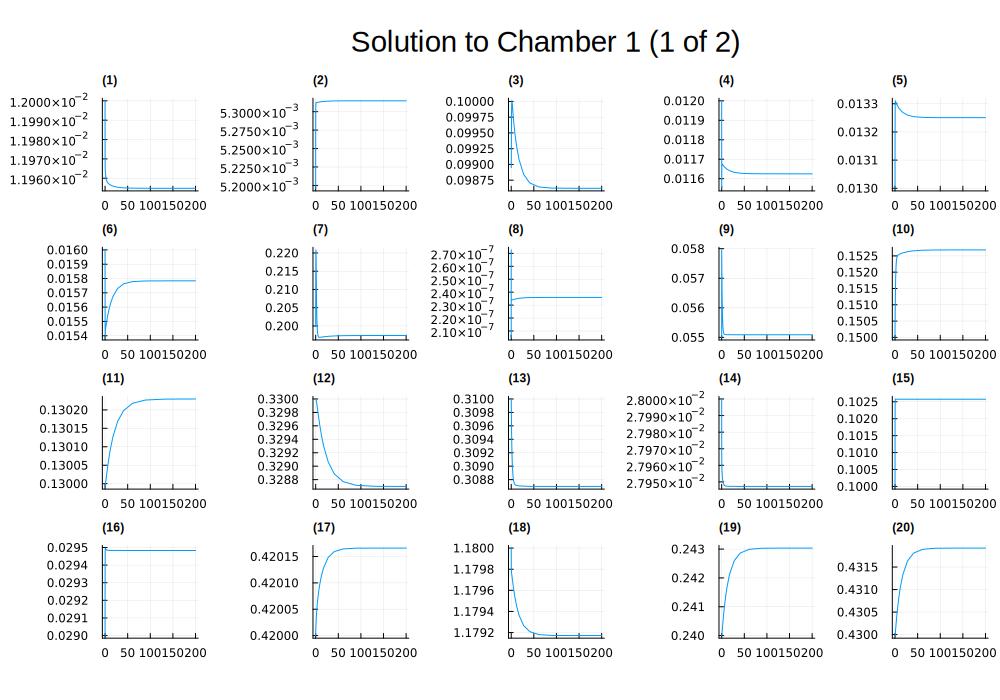

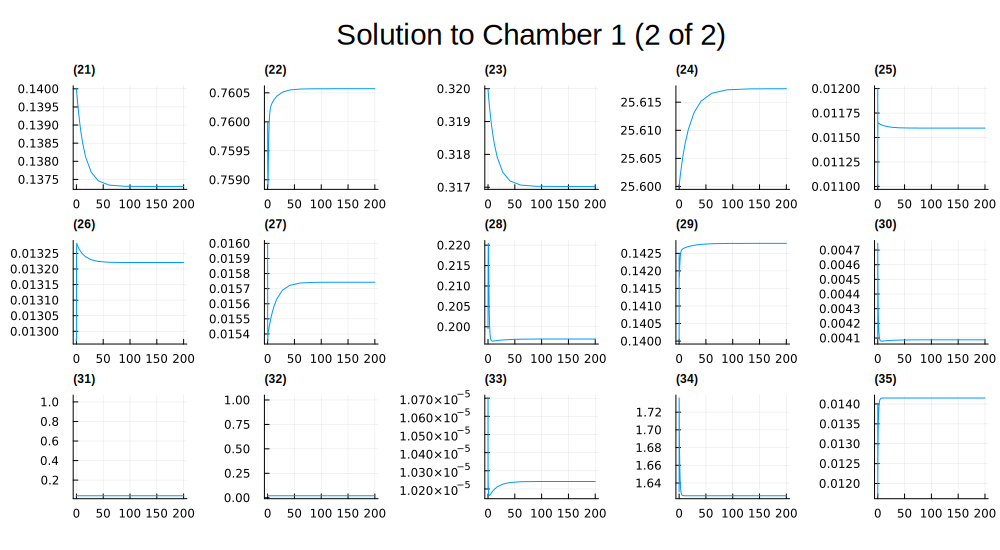

In [69]:
plotSols(sols[1],titleText="Solution to Chamber 1")

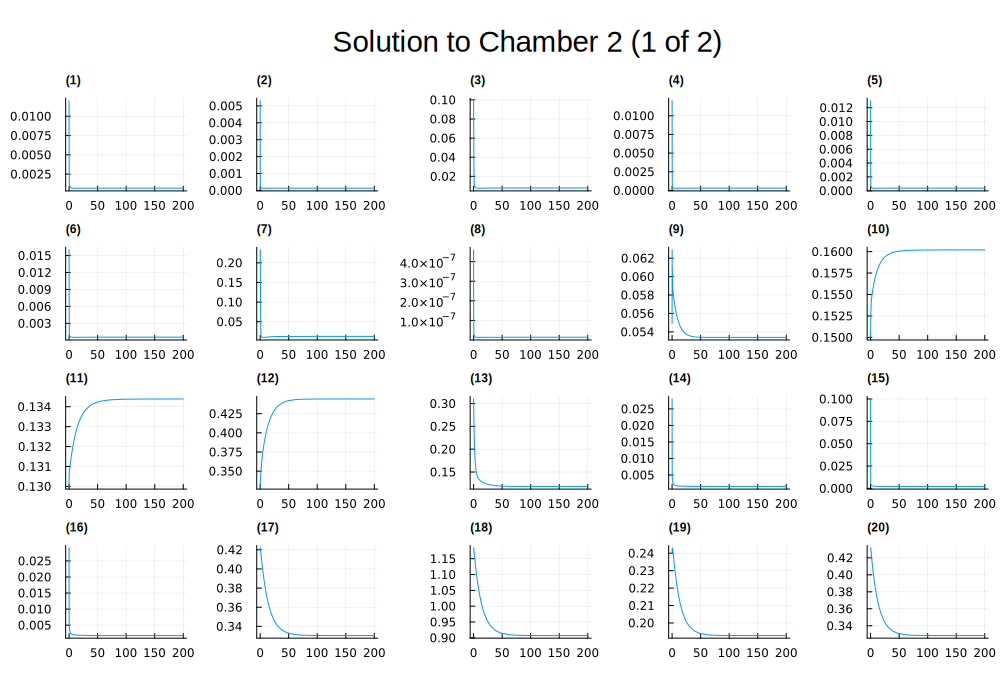

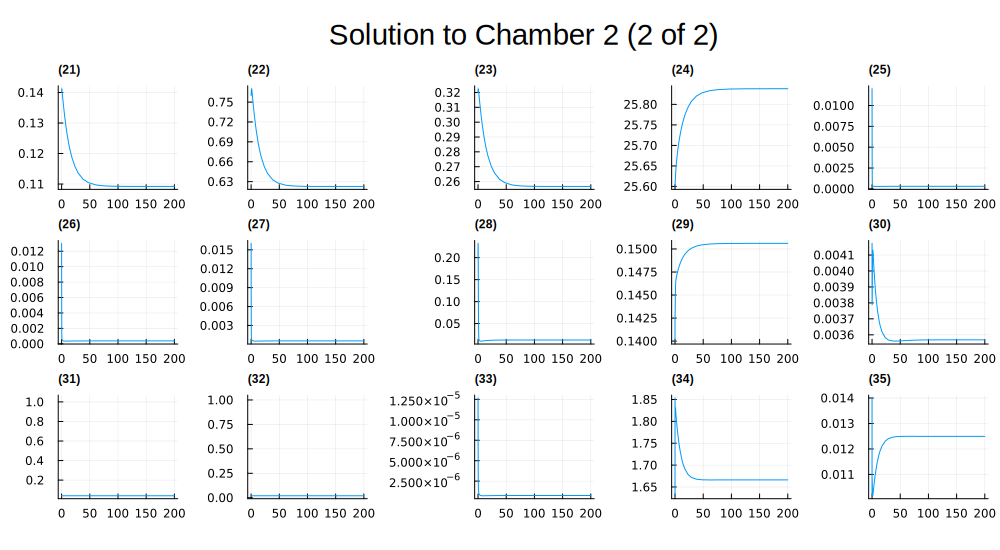

In [65]:
plotSols(sols[2],titleText="Solution to Chamber 2")

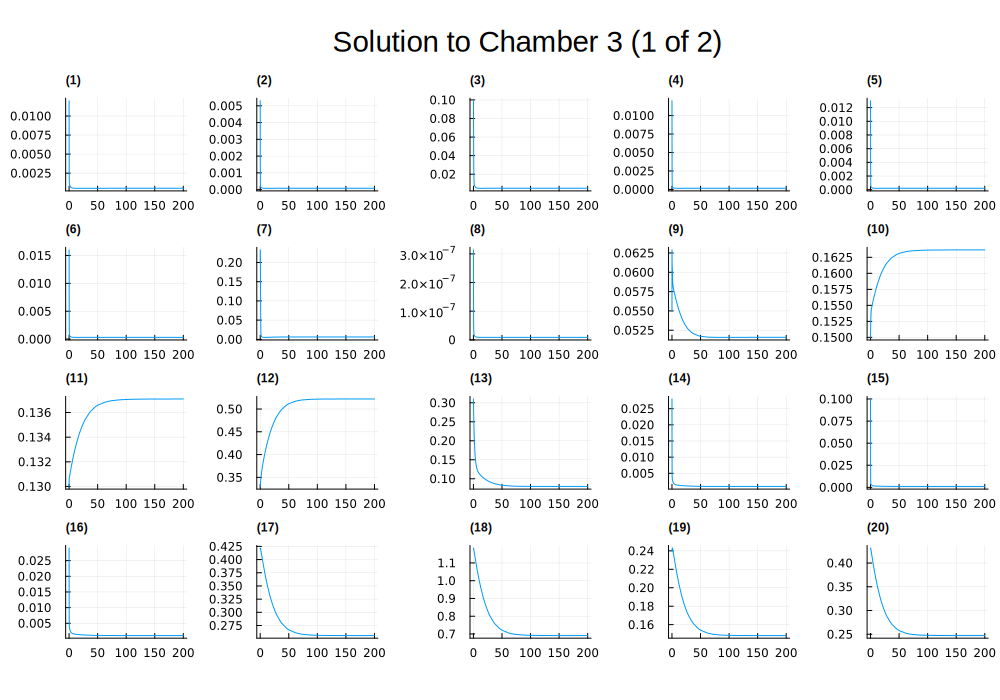

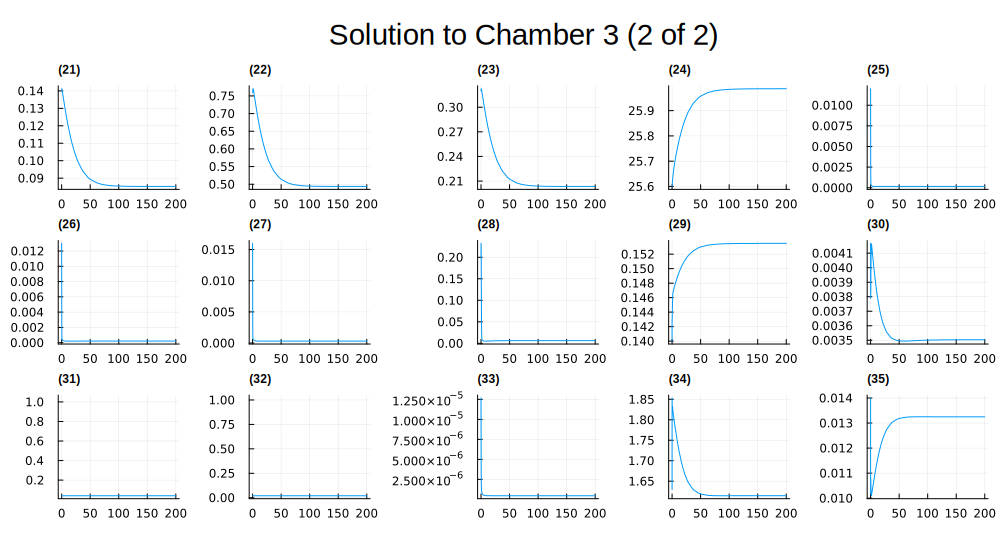

In [66]:
plotSols(sols[3],titleText="Solution to Chamber 3")

### Variable Inflow and Specifying Algorithms

To specify variable inflow to the first reactor in the series, the input is much the same as in the `ADM1sol` case:

In [67]:
u0 = initialConditions();

t = [i for i in tspan[1]:0.1:tspan[2]]; # Break the timespan into 0.1 day increments

IV_temp = inflowvector_definition(); # default inflow vector

IV = [IV_temp*(1.0-(i/100.0)) for i in t] # linearly decrease the inflow

solsVariedInflow = MultiChamberSolution((0.0,50.0),(u0,u0,u0),IV,t,3);

Finished Chamber 1
Finished Chamber 2
Finished Chamber 3


The above solutions can the be plotted using the `plotSols` function like in the previous example.

The solver algorithm can also be specified using the optional `alg` argument.